## Importing libs

In [2]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt

om0 = 1

## Testing the Poisson solver 

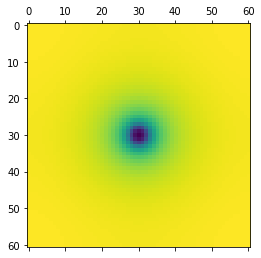

In [3]:
import poisson_solver as ps
i = 30
n = 2 * i + 1
r = 3
delta = np.zeros((n,n,n))
for a in range(-r, r+1):
    for b in range(-r, r+1):
        for c in range(-r, r+1):
            if (a**2 + b**2 + c**2) < r**2:
                delta[i+a,i+b,i+c] = 1
delta = fft.fftn(delta)
L = np.shape(delta)[0]
kx, ky, kz = fft.fftfreq(L), fft.fftfreq(L), fft.fftfreq(L)
delta *= ps.G(kx, ky, kz, 1, 1)
delta = fft.ifftn(delta).real
plt.matshow(delta[i-1])

## Testing the density update function

In [4]:
def test_du(grid_dens, pos, l, m, delta=True):
    for i in range(l):
        for j in range(l):
            for k in range(l):
                grid_dens[i,j,k] = 0
    for x in pos:
        i, j, k = np.floor(x)
        i, j, k = int(i), int(j), int(k)
        d = x - np.array([i, j, k])
        t = 1 - d
        grid_dens[i, j, k]             += m * t[0] * t[1] * t[2]
        grid_dens[(i+1)%l, j, k]       += m * d[0] * t[1] * t[2]
        grid_dens[i, (j+1)%l, k]       += m * t[0] * d[1] * t[2]
        grid_dens[i, j, (k+1)%l]       += m * t[0] * t[1] * d[2]
        grid_dens[(i+1)%l, (j+1)%l, k] += m * d[0] * d[1] * t[2]
        grid_dens[(i+1)%l, j, (k+1)%l] += m * d[0] * t[1] * d[2]
        grid_dens[i, (j+1)%l, (k+1)%l] += m * t[0] * d[1] * d[2]
        grid_dens[(i+1)%l, (j+1)%l, (k+1)%l] += m * d[0] * d[1] * d[2]
    if delta: # if we want to work with delta tilde instead of rho
        grid_dens -= np.ones(np.shape(grid_dens))
    return grid_dens

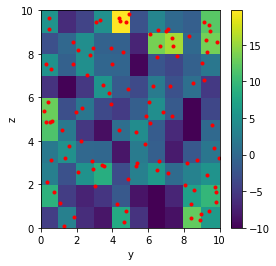

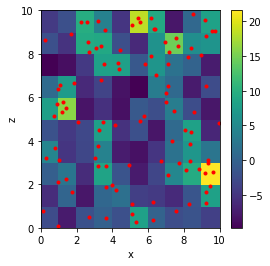

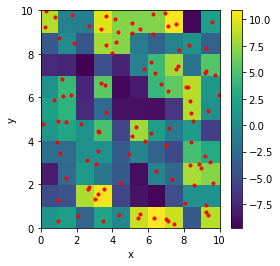

In [6]:
L = 10
N = 100
m = 10
grid = np.zeros((L,L,L))
pos = np.random.random((N,3)) * L
test_du(grid, pos, L, m)
# FOR X
gridX = np.zeros((L,L))
for x in range(L):
    gridX += grid[x,:,:]
plt.figure(figsize=plt.figaspect(1))
plt.pcolor(np.transpose(gridX))
plt.colorbar()
plt.plot((pos[:,1]+.5)%L, (pos[:,2]+.5)%L, 'r.')
plt.xlabel('y')
plt.ylabel('z')
plt.show()

# FOR Y
gridY = np.zeros((L,L))
for y in range(L):
    gridY += grid[:,y,:]
plt.figure(figsize=plt.figaspect(1))
plt.pcolor(np.transpose(gridY))
plt.colorbar()
plt.plot((pos[:,0]+.5)%L, (pos[:,2]+.5)%L, 'r.')
plt.xlabel('x')
plt.ylabel('z')
plt.show()

# FOR Z
gridZ = np.zeros((L,L))
for z in range(L):
    gridZ += grid[:,:,z]
plt.figure(figsize=plt.figaspect(1))
plt.pcolor(np.transpose(gridZ))
plt.colorbar()
plt.plot((pos[:,0]+.5)%L, (pos[:,1]+.5)%L, 'r.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Plane wave test (from pm.pdf)

In [3]:
Lbox = 100
Np = 10


def Dplus(a):
    return a

def Dpluspt(a):
    return 1

def x(i, a, A=Lbox/2 N=Np, L=Lbox):
    qi = i * L / N
    return qi * Dplus(a) *  A * np.sin(2*np.pi* qi / L)

def p(i, a, da, A=Lbox/2 N=Np, L=Lbox):
    return a**2 * Dpluspt(a - da/2) * A * np.sin(2*np.pi * i / N)

def pw_simulator(l, m, a, pos_init, mom_init):
    grid = np.zeros((l,l,l))
    pos, mom = pos_init, mom_init

    line = affiche(pos, 0, l, True, True)

    x_pre = np.copy(pos_init[0])
    l_pos = [np.copy(pos_init)[0]]
    pre_a = a[0]
    for current_a in a[1:]:
        da = current_a - pre_a
        pre_a = current_a
        step(grid, pos, mom, l, m, current_a, da)
        print('a :{:.3f} / {:.3f}--- p : {} --- dx : {}'.format(current_a, a[-1], mom[0], pos[0]- x_pre))
        x_pre = np.copy(pos[0])
        l_pos.append(np.copy(pos[0]))
        affiche(pos, line, l, True, False)
        plt.pause(0.01)
    affiche(pos, line, l, True, False)
    plt.show()
    return l_pos

array([0.01      , 0.01047616, 0.01097499, 0.01149757, 0.01204504,
       0.01261857, 0.01321941, 0.01384886, 0.01450829, 0.01519911,
       0.01592283, 0.01668101, 0.01747528, 0.01830738, 0.0191791 ,
       0.02009233, 0.02104904, 0.02205131, 0.0231013 , 0.02420128,
       0.02535364, 0.02656088, 0.02782559, 0.02915053, 0.03053856,
       0.03199267, 0.03351603, 0.03511192, 0.0367838 , 0.03853529,
       0.04037017, 0.04229243, 0.04430621, 0.04641589, 0.04862602,
       0.05094138, 0.05336699, 0.0559081 , 0.05857021, 0.06135907,
       0.06428073, 0.06734151, 0.07054802, 0.07390722, 0.07742637,
       0.08111308, 0.08497534, 0.08902151, 0.09326033, 0.097701  ,
       0.1023531 , 0.10722672, 0.1123324 , 0.1176812 , 0.12328467,
       0.12915497, 0.13530478, 0.14174742, 0.14849683, 0.15556761,
       0.16297508, 0.17073526, 0.17886495, 0.18738174, 0.19630407,
       0.20565123, 0.21544347, 0.22570197, 0.23644894, 0.24770764,
       0.25950242, 0.27185882, 0.28480359, 0.29836472, 0.31257

In [8]:
# CDM universe ; Om0 = 1
Lbox =  100
Np = 100
a_ini = 0.1
def dplus(a):
    return a
wave_amp = 10


q_ini = np.arange(Np) * Lbox/Np
x_ini = q_ini + dplus(a_ini) * wave_amp * np.sin(2 * np.pi * q_ini / Lbox)
p_ini = a_ini * wave_amp * np.sin(2 * np.pi * q_ini / Lbox) 

In [3]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,